# Games market analysis

### Progect description:

The analysis uses historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation), which are available from open sources. 

The purpose of the analysis is to identify patterns that determine the success of the game. 

This will allow to identify a potentially popular product and plan advertising campaigns.


The dataset contains data up to 2016. Let's take a look at them.


### Data description:

- Name — the name of the game
- Platform - platform
- Year_of_Release — year of release
- Genre - game genre
- NA_sales - sales in North America (millions of dollars)
- EU_sales - sales in Europe (millions of dollars)
- JP_sales - sales in Japan (millions of dollars)
- Other_sales - sales in other countries (millions of dollars)
- Critic_Score - critics' score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating - rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

 ###  Step 1. Importing and first look at data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

/opt/miniconda3/envs/analytics/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
games_data = pd.read_csv('/Users/tatianaisakova/Desktop/GITHUB/Games_market/games.csv')

In [3]:
#what data type we have
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#summary statistics
games_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
games_data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
games_data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
#checking for duplicates in a dataset
games_data.duplicated().sum()

0

In [8]:
#data with missing values
games_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
games_data[pd.isna(games_data['Name'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#amount of data by platform
games_data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
#amount of data by genre
games_data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [12]:
#unique critic ratings
games_data['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [13]:
#unique user ratings
games_data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
games_data[games_data['User_Score'] =='tbd'].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [15]:
games_data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Summarizing all of the above:

- In the Critic_Score, User_Score, and ESRB rating columns, nearly half of the data is missing. This could be due to incomplete data as it was taken from open sources.
    
     It is possible that a game's rating is not displayed if there is not a certain number of reviews. For example, on the Metacritic website, the game ratings indicate that only those games with 7 or more reviews are included in the list.

     Also, the ESRB has only existed since 1994. Games released before 1994 may not have this rating.
    
     In order not to distort the already incomplete data, let's fill in the gaps for these columns with markers - some non-existent value, so that during further analysis we can remove such data into a separate category.
    

- In User_Score there is an abbreviation 'tbd' - 'To Be Determined'. Metacritic states that the rating is not displayed if there are not at least 4 reviews.
    
     Let's replace 'tbd' with a marker or with NaN so that this value cannot in any way affect the further calculation.
    
    
- There are only ~1.6% gaps in Name, Genre and Year_of_Release - they can be removed. This should not greatly affect the analysis results.


- On the official ESRB website, only 6 categories are listed in the ratings category, but in our dataset there are 8 of them. Most likely, some categories have been renamed. For example, as happened with the K-A category - Kids to Adults (K-A) was renamed 'Everyone' in 1998.
    
     Therefore, it will be possible to combine these categories into one.
    
    
- Let's convert the column names to lowercase and replace the data type with int for Year_of_Release and Critic_Score, User_Score with float.


- There are no duplicates in the dataset.

### Step 2. Data preprocessing

- __Convert the column names to lowercase.__

In [16]:
games_data.columns = games_data.columns.str.lower()
games_data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


- __Delete lines with gaps in name, genre and year_of_release.__

In [17]:
games_data = games_data.dropna(subset=['name', 'genre', 'year_of_release'])

In [18]:
games_data[['name', 'genre', 'year_of_release']].isna().sum()

name               0
genre              0
year_of_release    0
dtype: int64

- __Fill in the gaps in critic_score, user_sсore и rating.__

Among the ratings of critics and users, there are clearly no values with a rating of 777. Let's consider this number as a marker and replace the gaps in critic_score and user_score with it.

In [19]:
marker = 777

In [20]:
games_data['critic_score'] = games_data['critic_score'].fillna(marker)

For user_score, first replace 'tbd' with NaN, then fill in the gaps with a marker.

In [21]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.nan).fillna(marker)

In [22]:
#checking the result
games_data[['critic_score', 'user_score']].isna().sum()

critic_score    0
user_score      0
dtype: int64

Let's fill in the gaps in rating with the non-existent category 'undefined'. Then we will combine the rating categories that were once renamed.

In [23]:
games_data['rating'] = games_data['rating'].fillna('undefined')
games_data['rating'].value_counts()

undefined    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

*Currently the following rating categories exist: E, E10+, T, M, AO, RP. The EC ranking has not existed since 2018. And K-A is now renamed E.*

*Therefore, EC and K-A will be combined with E.*

*Since there is only one game rated RP (the ESRB has not yet assigned a final rating), it may be possible to combine it with our undefined category.*

In [24]:
games_data[games_data['rating'] == 'RP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


In [25]:
#checking if the game is on other paltforms 
games_data[games_data['name'] == 'Supreme Ruler: Cold War']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


*Let's see what kind of game it is with an AO rating.*

In [26]:
games_data[games_data['rating'] == 'AO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


In [27]:
games_data[games_data['name'] == 'Grand Theft Auto: San Andreas']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
875,Grand Theft Auto: San Andreas,XB,2005.0,Action,1.26,0.61,0.00,0.09,93.0,8.6,AO
2115,Grand Theft Auto: San Andreas,PC,2005.0,Action,0.00,0.93,0.00,0.04,93.0,8.9,M
10311,Grand Theft Auto: San Andreas,X360,2008.0,Action,0.08,0.02,0.00,0.01,777.0,7.5,M


*We see that Grand Theft Auto: San Andreas is available on different platforms and three of them are rated M.
Until a certain year, San Andreas actually had an AO rating. Now the ESRB has assigned it an M rating.*

*For the XB platform, we will replace AO with M in order not to compare one game with many others by category.*

In [28]:
games_data['rating'] = games_data['rating'].replace({'EC': 'E',
                                        'K-A': 'E',
                                        'RP': 'undefined',
                                        'AO': 'M'})
games_data['rating'].value_counts()

undefined    6677
E            3932
T            2905
M            1537
E10+         1393
Name: rating, dtype: int64

*Let's check if there are any missing values in the dataset.*

In [29]:
games_data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

- __There are no more missing data. Let's start replacing data types.__

In [30]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Convert year_of_release and critic_score to int, user_score to float.

In [31]:
games_data[['year_of_release', 'critic_score']] = games_data[['year_of_release', 'critic_score']].astype(int)
games_data['user_score'] = games_data['user_score'].astype(float)

In [32]:
games_data[['year_of_release', 'critic_score', 'user_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16444 non-null  int64  
 1   critic_score     16444 non-null  int64  
 2   user_score       16444 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 513.9 KB


-  __Let's calculate the total sales in all regions and write them in a separate column.__

In [33]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,777,777.0,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,777,777.0,undefined,31.38


### Summarizing all of the above:

- Removed lines with missing values in name, genre and year_of_release.

- Filled in critic_score, user_score and rating with markers.

- For rating, some groups have been combined, since some of them have been renamed or are no longer used at all.

- Replaced data types.

- We calculated the total sales of each game and recorded the data in a new column.

### Step 3. Exploratory data analysis

During exploratory data analysis, the following questions will be answered:

- __How many games were released in different years? Is data for all periods important?__

Let's calculate the number of games released in each year.

In [34]:
year_games_count = games_data.pivot_table(index = 'year_of_release',
                                   values = 'name',
                                   aggfunc = 'count')
year_games_count.columns = ['games_count']
year_games_count

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Let's build a graph and see in what period the most games were released.

In [35]:
# set the settings for visualization
sns.set(rc={'figure.figsize':(8,6)})

#sns.set_palette("Blues_d")
sns.set_context("paper", font_scale=1.5)
sns.set_style("whitegrid", {'xtick.bottom': "True"})

Text(0.5, 1.0, 'Number of games released by year')

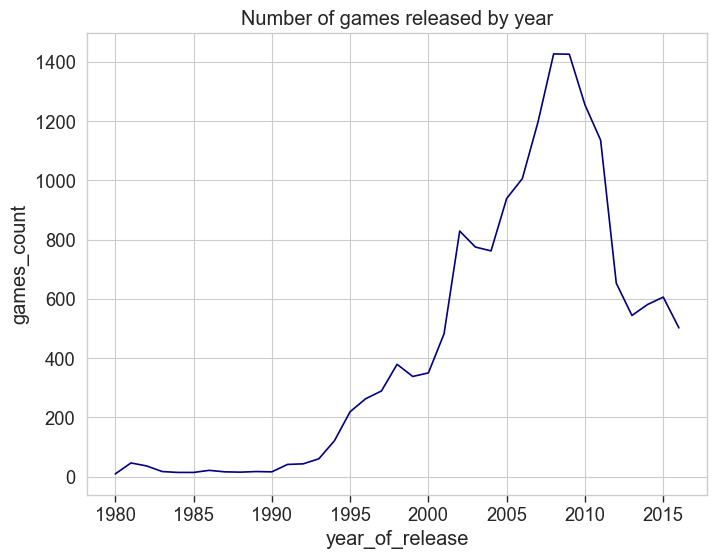

In [36]:
sns.lineplot(x=year_games_count.index, y='games_count', data=year_games_count, color = 'navy')
plt.title('Number of games released by year')

As can be seen from the chart, the most games were released between 2005 and 2011.

- __See how sales have changed by platform. Select the platforms with the highest total sales and plot the distribution by year. Over what typical period do new platforms appear and old platforms disappear?__

Let's select the platforms with the largest amount of sales across all regions.

In [37]:
platform_sales = games_data.pivot_table(index = 'platform',
                                 values = 'total_sales',
                                 aggfunc = ['sum', 'count']).sort_values(('sum','total_sales'), ascending=False) 
# Rename the columns
platform_sales.columns = ['total_sales', 'games_release']

# Add an additional column with a percentage of total sales
platform_sales['procentage_of_sale'] = platform_sales['total_sales'] / platform_sales['total_sales'].sum()

platform_sales.style.format( "{:.2f}")

,total_sales,games_release,procentage_of_sale
platform,,,
PS2,1233.56,2127.00,0.14
X360,961.24,1232.00,0.11
PS3,931.34,1306.00,0.11
Wii,891.18,1286.00,0.10
DS,802.78,2121.00,0.09
PS,727.58,1190.00,0.08
PS4,314.14,392.00,0.04
GBA,312.88,811.00,0.04
PSP,289.53,1193.00,0.03


The best-selling platform is PlayStation 2, both in terms of total sales and the number of games released.

The Nintendo DS is almost as good as the PS2 in terms of number of games, but sales are 35% lower.

Let's select the platforms with the highest total sales and plot the distribution by year.

In [38]:
# group sales by year for the top 10 platforms by total sales
platform_sales_by_year = games_data.query('platform in @platform_sales.head(10).index').pivot_table(
    index=['platform', 'year_of_release'],
    values=['total_sales'],
    aggfunc='sum').reset_index()

In [39]:
# save the names of the top 10 platforms in a separate list
top10 = list(platform_sales.head(10).index)
top10

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Let's visualize the data for each of these platforms.

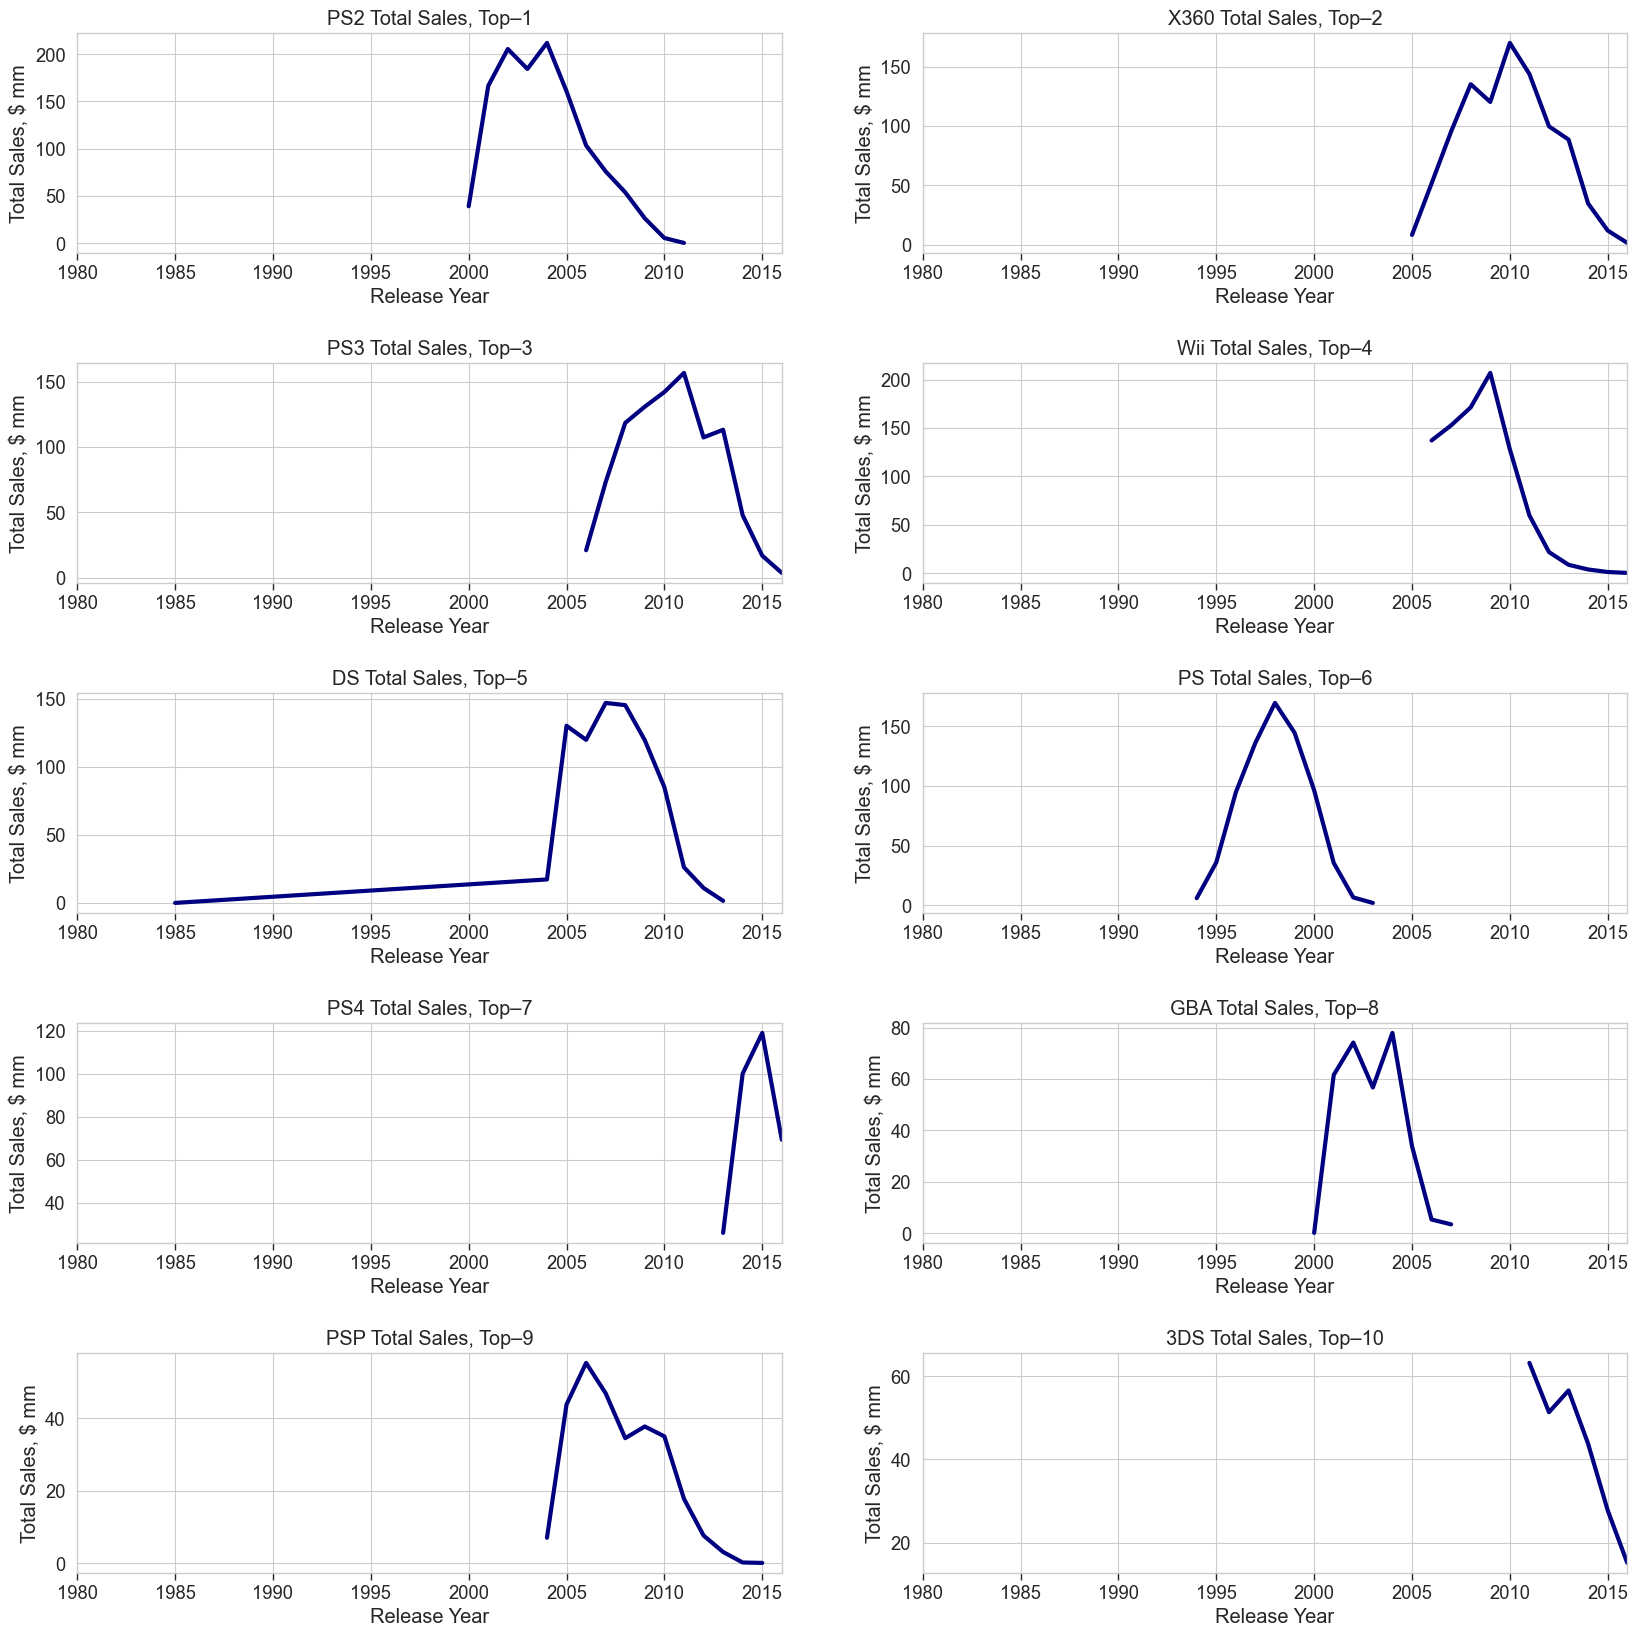

In [40]:
f, axes = plt.subplots(5, 2, figsize=(20, 20))

subplot_row = 0

for row in axes:
    for column in row:
        platform = top10[subplot_row]
        sns.lineplot(
            x=platform_sales_by_year.query('platform == @platform')['year_of_release'],
            y=platform_sales_by_year.query('platform == @platform')['total_sales'],
            lw=3,
            ax=column,
            color = 'navy'
        )
        column.set_xlim([1980, 2016])
        column.set_title(f'{platform} Total Sales, Top–{subplot_row + 1}')
        column.set_xlabel('Release Year')
        column.set_ylabel('Total Sales, $ mm')
        subplot_row += 1
        
plt.subplots_adjust(hspace=0.5) 


- The average lifespan of platforms is within 7-10 years. Peak sales occur around 3-5 years of the console's life.
The best-selling consoles are the 6th and 7th generations - PS2 (6th generation) and X360, PS3, Wii (7th generation).

- All charts look approximately the same, except for Nintendo DS platform sales graph where sales begin in 1985. Due to the fact that the console itself was only released in 2004, we should check which games in the dataset have the year of release 1985 and replace the year with the right one.
    
    
- We will also determine the current period as period between 2008 to 2015 year as the average lifespan of a console is approximately 7 years. During this period, we can still see consoles whose lifespan is coming to an end, and the emergence of new 7-8 generation consoles.

In [41]:
games_data[(games_data['platform'] == 'DS')&(games_data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,777,777.0,undefined,0.02


Let's replace the game's release year with 2007 when it was actually released..

In [42]:
games_data.year_of_release = pd.np.where(games_data.name == 'Strongest Tokyo University Shogi DS', 2007, games_data.year_of_release)

/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/727039811.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  games_data.year_of_release = pd.np.where(games_data.name == 'Strongest Tokyo University Shogi DS', 2007, games_data.year_of_release)


- __Which platforms are leading in sales, growing or falling? Select several potentially profitable platforms.__

Since we will analyze data only for the current period, we will save data for 2008-2015 in a separate dataset.

In [43]:
data_actual = games_data.query('2008 <= year_of_release <= 2015')
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60,7.2,E10+,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,777,777.0,E,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63,5.8,undefined,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,777,777.0,undefined,0.01


Let's group by total sales and see the top platforms.

In [44]:
data_actual_pivot = data_actual.pivot_table(index = 'platform',
                                 values = 'total_sales',
                                 aggfunc = ['sum', 'count']).sort_values(('sum','total_sales'), ascending=False) 
# Rename columns
data_actual_pivot.columns = ['total_sales', 'games_release']
data_actual_pivot

,total_sales,games_release
platform,,
PS3,833.59,1151
X360,804.44,985
Wii,601.08,1056
DS,388.60,1402
PS4,244.89,228
3DS,242.67,466
PC,146.04,608
PSP,136.38,761
XOne,133.17,160


If in terms of total sales for all periods the best-selling platform was the PlayStation 2, it now closes the top 10 and lags far behind in sales. It is obvious that sales are declining. And the console's lifespan is coming to the end.

It is being replaced by newer generation consoles PlayStation 3 and X360.

Let's build lineplot to see which platforms sales are growing and which ones are falling. To do this, we will group the data by platform and year of release and calculate the total sales for each year and the ratio of these sales to the total sales for all platforms.

In [45]:
data_actual_platform_sales_year = data_actual.groupby(['platform', 'year_of_release'])['total_sales'].sum()
data_actual_sales_year = data_actual_platform_sales_year.groupby('year_of_release').sum()

In [46]:
# Sales share of total sales for each platform
sales_part = (data_actual_platform_sales_year / data_actual_sales_year).reset_index()

In [47]:
# Let's take the top 10 and save the platform names into a list
actual_top_platforms = list(data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index)

# Save data on the selected platforms and build charts
top10_part = sales_part.query('platform in @actual_top_platforms')

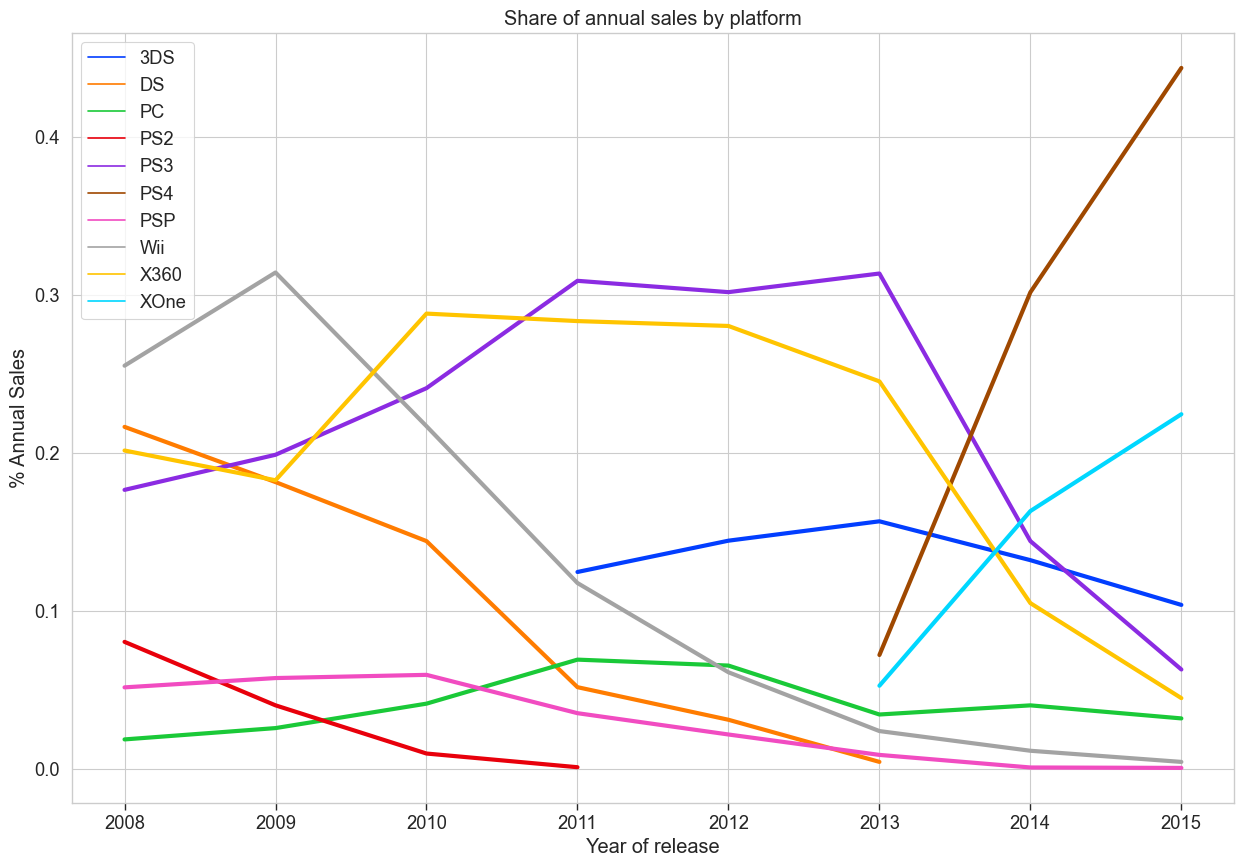

In [48]:
fig = plt.figure(figsize=(15,10))

sns.lineplot(x = top10_part['year_of_release'],
             y = top10_part['total_sales'],
             hue= top10_part['platform'],
             lw=3,
             palette='bright')

plt.title('Share of annual sales by platform')
plt.ylabel('% Annual Sales')
plt.xlabel('Year of release')
plt.legend(loc='upper left')

plt.show()


- Earlier generation platforms (for example, PS2) are inferior in sales to the new generation of consoles and are in the final stage of their life cycle.

- Sales of the PS3 and X360 platforms are declining.

- The 8th generation platforms PlayStation4 and XOne, released in 2013, will be at the peak of their sales in 2015-2016. Moreover, PS4 sales account for more than 40% of sales of all games for the year. This is the largest share among the top 10 platforms in terms of total sales.

- Among the potentially profitable platforms are PlayStation4, XOne, DS.

- __Build a box-plot of global sales of each game by platform. Is there a big difference in sales? What about average sales on different platforms? Describe the result.__

Let's build a box-plot for potentially profitable platforms and look at the distribution of game sales within each platform.

In [49]:
potential_platform = ['PS4', 'XOne', 'DS']
potential_platform_query = data_actual.query('platform in @potential_platform')

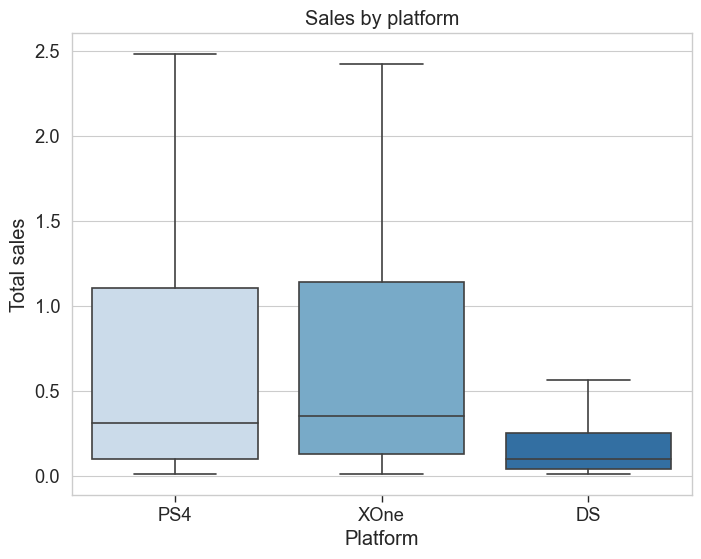

In [50]:
sns.boxplot(data=potential_platform_query,
            x='platform',
            y='total_sales',
            showfliers=False,
            palette='Blues',
            order=potential_platform)

plt.title('Sales by platform')
plt.ylabel('Total sales')
plt.xlabel('Platform')
plt.show()

/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/3280953971.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(potential_platform_query.query('platform == @platform')['total_sales'], kde=False, color = 'Blue')


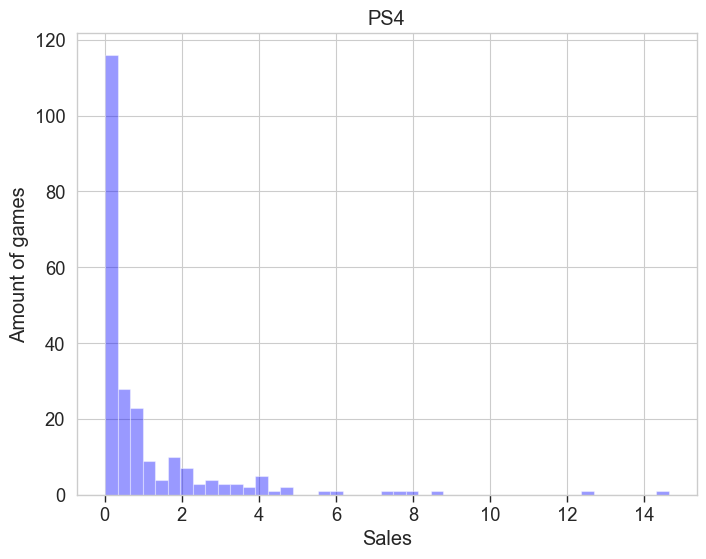

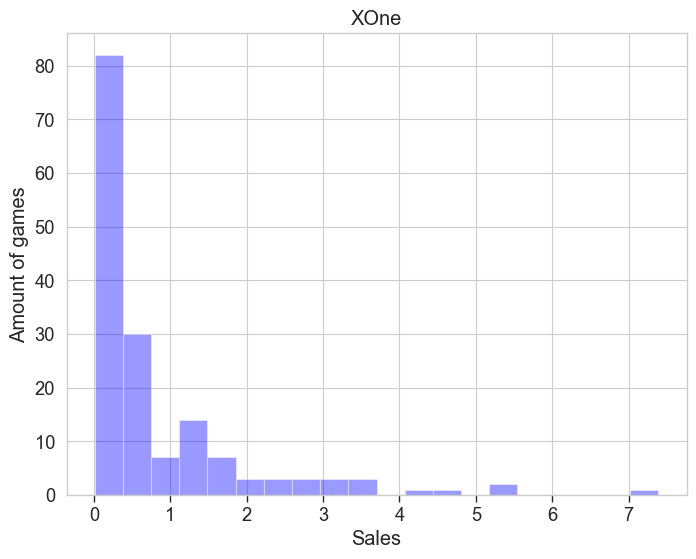

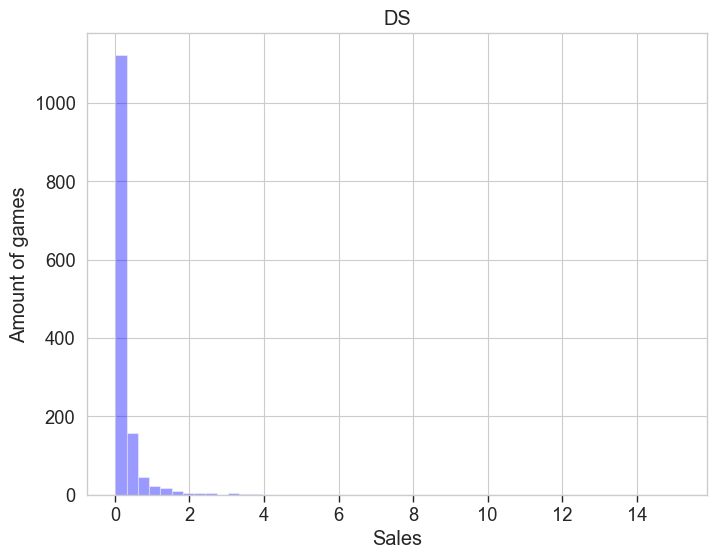

In [51]:
for platform in potential_platform:
    sns.distplot(potential_platform_query.query('platform == @platform')['total_sales'], kde=False, color = 'Blue')
    plt.title(f'{platform}')
    plt.ylabel('Amount of games')
    plt.xlabel('Sales')
    plt.show()

In [52]:
potential_platform_query.pivot_table(index='platform',
                                     values='total_sales').sort_values('total_sales', ascending=False).style.format('{:.2f}')

,total_sales
platform,
PS4,1.07
XOne,0.83
DS,0.28


- Sales of new generation consoles are more profitable. On average, sales of 8th generation consoles are more than 1 million dollars - PS4 (1 million dollars) and XOne (800 thousand dollars).


- Nintendo DS is significantly inferior in sales to new generation platforms. And it is in a decline stage.


- As you can see in the histograms, the distributions for PS4 and Xbox One are skewed to the right - most likely due to the large number of hit games released during this period.

- __See how user reviews and critics affect sales within one popular platform. Create a scatterplot and calculate the correlation between reviews and sales. Formulate your conclusions.__

Let's build correlation charts and look at the ratio of sales to user/critic ratings.

/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/665727218.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=potential_platform_query.query(query),
/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/665727218.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=potential_platform_query.query(query),
/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/665727218.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=potential_platform_query.query(query),
/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/665727218.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=potential_platform_query.query(query),
/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/665727218.py:13: UserWarning: Ignoring `palette` be

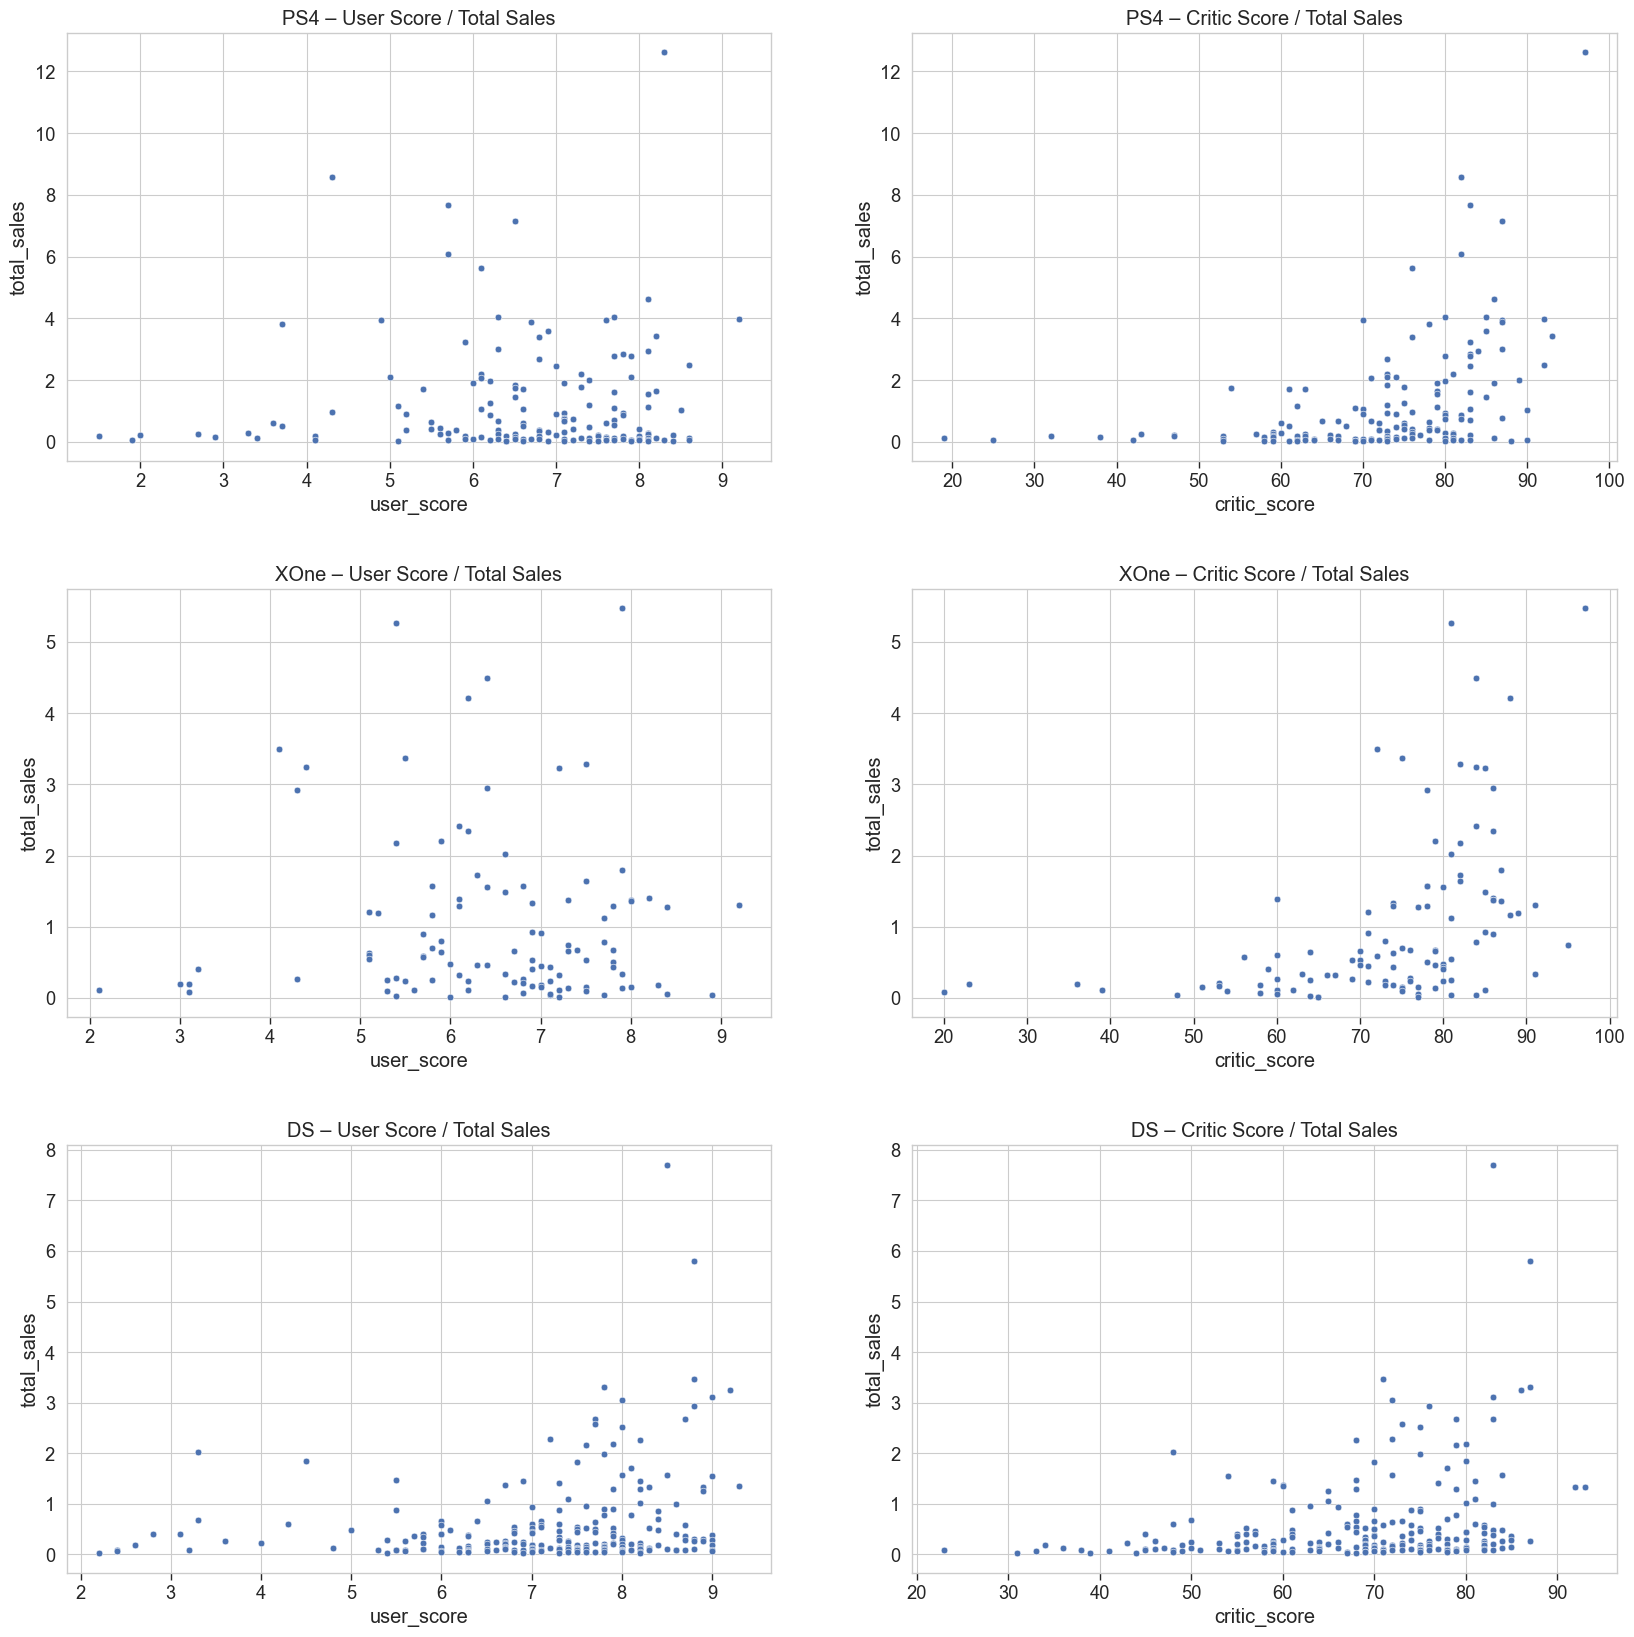

In [53]:
# Let's remove games for which the ratings were filled in with markers
no_marker = 'user_score != 777 and critic_score != 777'

fig, axes = plt.subplots(3, 2, figsize=(20,20))

platform_index = 0

for row in axes:
    
    platform = potential_platform[platform_index]
    query = no_marker + 'and platform == @platform'  

    sns.scatterplot(data=potential_platform_query.query(query),
                    x='user_score',
                    y='total_sales',
                    palette='Blues',
                    ax=row[0])
    
    row[0].set_title(f'{platform} – User Score / Total Sales')
    
    sns.scatterplot(data=potential_platform_query.query(query),
                    x='critic_score',
                    y='total_sales',
                    palette='Blues',
                    ax=row[1])
    
    row[1].set_title(f'{platform} – Critic Score / Total Sales')
    
    platform_index += 1

fig.subplots_adjust(hspace=0.3)
plt.show()

Let's calculate the correlation coefficients.

In [54]:
score_sale_corr = potential_platform_query.query(no_marker).groupby('platform')[['total_sales', 
                                                                              'critic_score', 
                                                                              'user_score']].corr()['total_sales'].reset_index()
score_sale_corr.columns = ['platform', 'score', 'corr']

In [55]:
score_sale_corr.loc[score_sale_corr['score'] != 'total_sales'].pivot_table(
    index='platform',
    columns='score',
    values='corr').style.format( "{:.2f}")

score,critic_score,user_score
platform,,
DS,0.29,0.23
PS4,0.43,0.02
XOne,0.45,-0.05


- For the PS4 and XOne platforms, there is a stronger correlation between sales and critic ratings than between sales and user ratings.
It is obvious that users trust critics' ratings more when choosing a game than reviews from other players.


- On the DS platform, the connection between sales and reviews is very weak.

- __Look at the overall distribution of games by genre. What can you say about the most profitable genres? Are there genres with high and low sales?__

Let's build a pie chart and look at the distribution of games by genre.

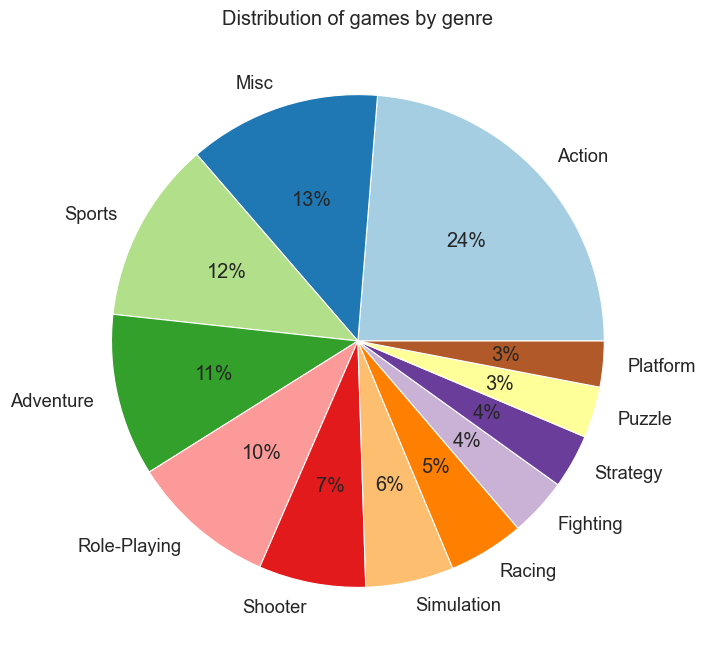

In [56]:
genre_data = data_actual.groupby('genre').size()

genre_data.sort_values(ascending=False).plot(kind='pie', subplots=True, 
                                             autopct='%1.0f%%', colors=sns.color_palette("Paired")[0:12], figsize=(8, 8))
plt.title("Distribution of games by genre")
plt.ylabel("")
plt.show()

- The most popular genres are action, misc, sports and adventure - they account for more than 50% of the games market.

- Less popular genres are fighting, strategy, puzzle.

### Summarizing all of the above:

- The period in which the most games were released was from 2005 to 2011.


- The average lifespan of the platform is 7-10 years. The peak of sales occurs in the 3-5th year of the platform’s life.


- The current period was chosen from 2008 to 2015 - during this period, sales of a particular console go through three stages - the beginning of sales, the peak of sales and the period of decline. Several new platforms were also released during this period.


- Among all platforms, PlayStation consoles have the largest share of sales - more than 40%.


- The PS4 and Xone platforms have a positive correlation between sales and critics ratins. On the contrary, the correlation between sales and user ratings is weak.


- The most popular genres are action, misc, sports and adventure - they account for more than 50% of the games market.

### Step 4: Create a user profile for each region

- __The most popular platforms (top 5). Describe the differences in sales shares.__

In [57]:
# Columns needed for plotting
columns = ['name', 'platform', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'rating']

In [58]:
data_region = data_actual[columns].melt(id_vars=['name', 'platform', 'genre', 'rating'],
                                        var_name='region',value_name='sales')

data_region['region'] = data_region['region'].str.upper().str.replace('_SALES', '')

In [59]:
# Use the nlargest() method to select the top 5
top_5_platforms_by_region = (data_region.groupby(['region', 'platform'])['sales'].sum()\
    .groupby(level=0, group_keys=False).nlargest(5)/ data_region.groupby('region')['sales'].sum()).reset_index()

/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/2373800927.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = top_5_platforms_by_region['region'],


<AxesSubplot: xlabel='region', ylabel='sales'>

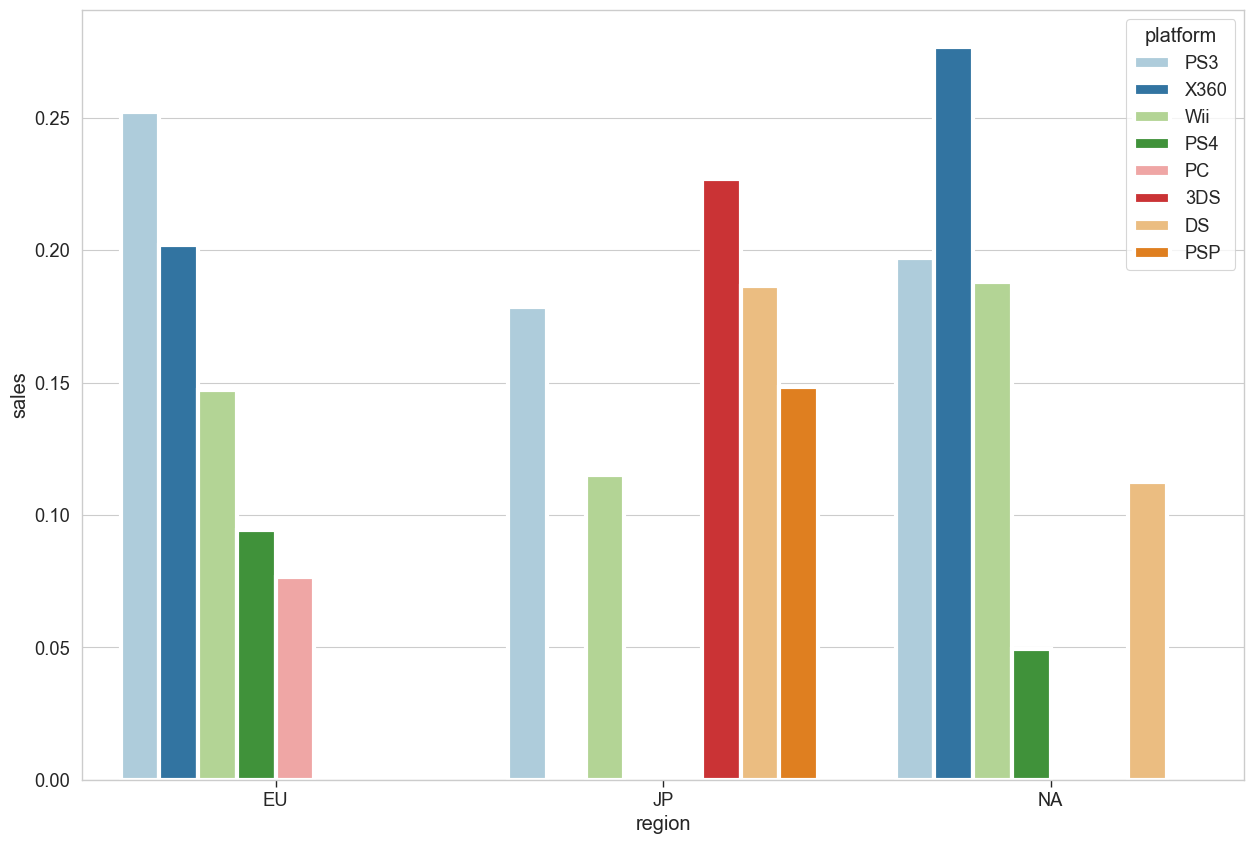

In [60]:
fig = plt.figure(figsize=(15,10))

sns.barplot(x = top_5_platforms_by_region['region'],
            y = top_5_platforms_by_region['sales'],
            hue = top_5_platforms_by_region['platform'],
            ci = False,
            lw=3,
            palette='Paired')

- Almost the same platforms are popular in North America and Europe. PS3 and X360 especially stand out. The difference in the distribution of sales shares:

     For Europe - the share of total sales for all games is 25% for PS3 and 20% for X360, respectively;
     
     For North America, on the contrary, the more popular platform is X360 (sales share >25%).
     
     
- In Japan, the 8th generation consoles Nintendo 3DS and DS are very popular - the share of sales is >20%, while in the other two regions consoles of the previous generation are popular.

- __The most popular genres (top 5). Explain the difference.__

In [61]:
# Используем метод nlargest() для выбора топ 5
top_5_platforms_by_genre = (data_region.groupby(['region', 'genre'])['sales'].sum()\
    .groupby(level=0, group_keys=False).nlargest(5)/ data_region.groupby('region')['sales'].sum()).reset_index()

/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/3568292495.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = top_5_platforms_by_genre['region'],


<AxesSubplot: xlabel='region', ylabel='sales'>

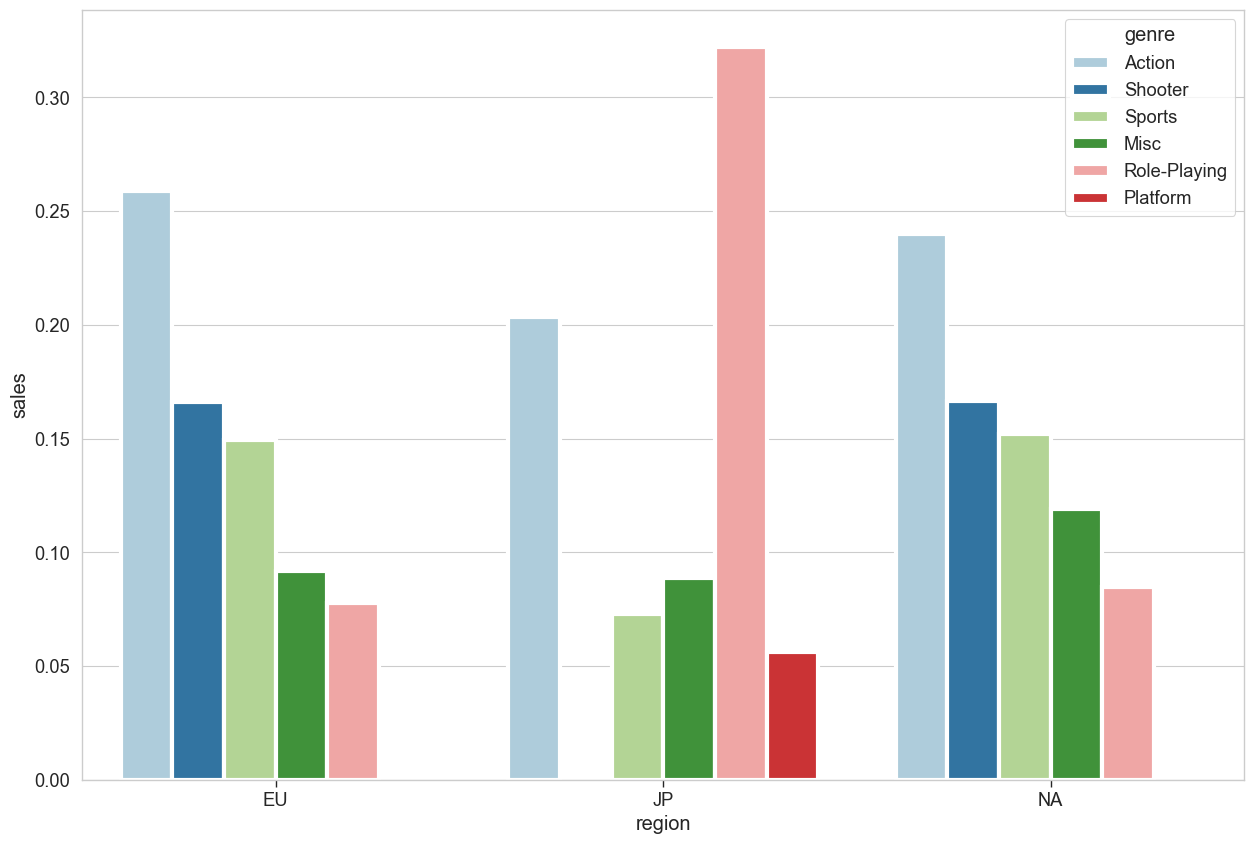

In [62]:
fig = plt.figure(figsize=(15,10))

sns.barplot(x = top_5_platforms_by_genre['region'],
            y = top_5_platforms_by_genre['sales'],
            hue = top_5_platforms_by_genre['genre'],
            ci = False,
            lw=3,
            palette='Paired')

- In addition to consoles, the same genres are also popular in Europe and North America, with almost the same distribution of sales shares: Action, Shooter, Sports. Less popular are Misc and Role-Playing.


- Japan has a completely different situation. Among the top 5 genres, Role-Playing is in first place with a sales share of more than 30%.
Action is in second place with a 20% share of sales.
    
     Also, among the top popular genres in Japan, the Platform genre stands out, which is not found either in Europe or North America.

- __Does the ESRB rating affect sales in a particular region?__

Since we filled in the missing values in the rating with a non-existent value, we will take this into account when plotting the graphs.

In [63]:
top_5_platforms_by_rating = (data_region.query('rating != "undefined"').groupby(['region', 'rating'])['sales'].sum()\
    .groupby(level=0, 
             group_keys=False).nlargest(5)/ data_region.query('rating != "undefined"').groupby('region')['sales'].sum()).reset_index()

/var/folders/4p/3_1w5nbn7sgbzmgcxd52tb6m0000gn/T/ipykernel_54647/3763134506.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = top_5_platforms_by_rating['region'],


<AxesSubplot: xlabel='region', ylabel='sales'>

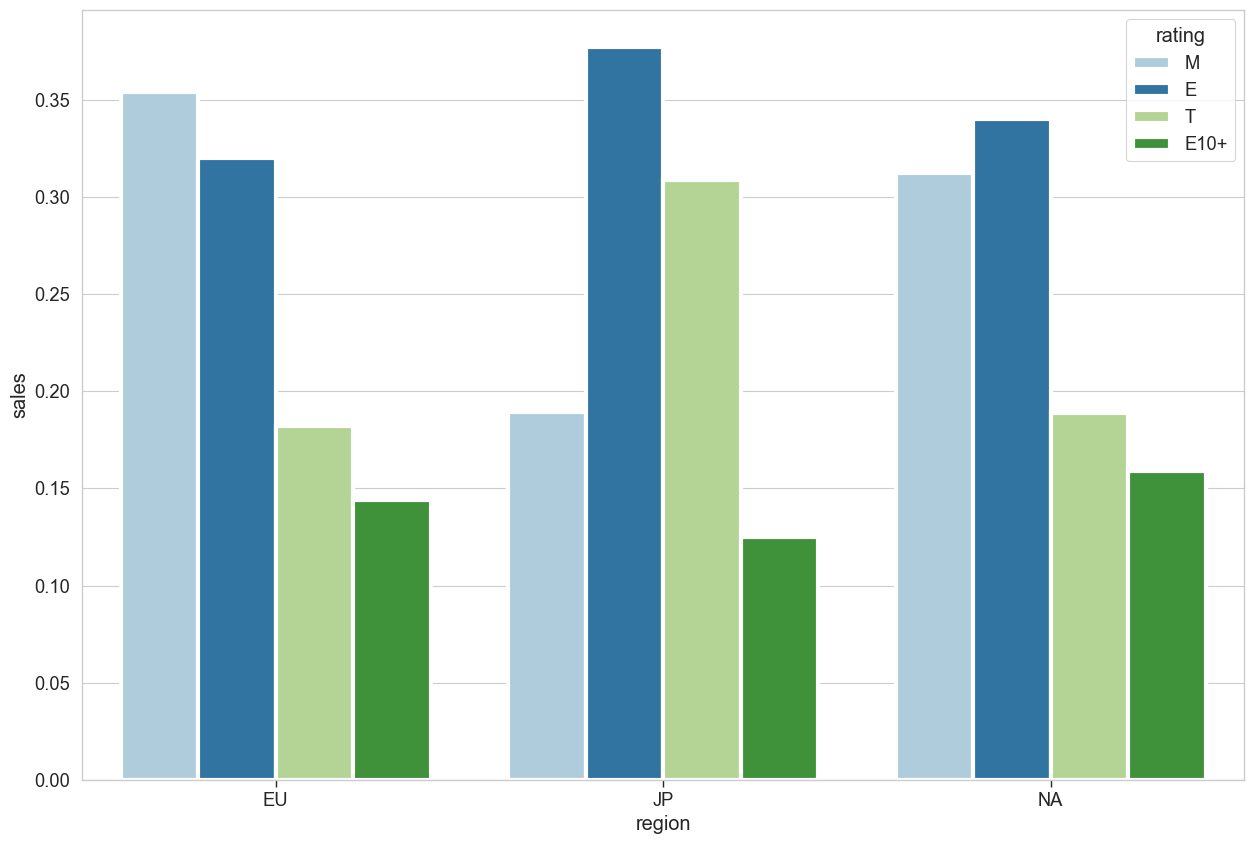

In [64]:
fig = plt.figure(figsize=(15,10))

sns.barplot(x = top_5_platforms_by_rating['region'],
            y = top_5_platforms_by_rating['sales'],
            hue = top_5_platforms_by_rating['rating'],
            ci = False,
            lw=3,
            palette='Paired')

- If we consider the impact of the ESRB rating on sales, then for all regions the popular games are those with an E rating (for all ages).


- There is a difference in sales of games rated M (for ages 17+):

     In Europe and North America, the share of sales of such games is more than 30%, while in Japan their share is less than 20%.

### Summarizing all of the above:

- Users from North America and Europe show equal preference for the PS3 and X360 platforms.


- In Japan, the new generation consoles Nintendo 3DS and DS are popular among users. Their share of sales is >20%.


- Among the genres, users from Europe and North America will choose Action, Shooter or Sports rather than Misc or Role-Playing.


- In Japan, among the top 5 genres, role-playing games are in first place with a sales share of more than 30%. 'Action' is in second place with a 20% share of sales.


- As for the ESRB rating, the E rating is common for all regions.

### Step 5: Test hypotheses

- __The average user ratings for the Xbox One and PC platforms are the same.__

Let us formulate the null and alternative hypotheses:

H0 – the average user ratings for the Xbox One and PC platforms are equal.

H1 – The average user ratings for the Xbox One and PC platforms are not equal.

Since we need to test the hypothesis about the equality of the average of two general populations using samples taken from them, we will use the __scipy.stats.ttest_ind().__ method

Since the data is not complete and there is a fairly large number of gaps, we will set the level alpha = 0.01 to be absolutely sure of the result.

In [65]:
xbox = data_actual.query('user_score != 777 and platform == "XOne"')['user_score']
pc = data_actual.query('user_score != 777 and platform == "PC"')['user_score']

In [66]:
alpha = 0.01

results = st.ttest_ind(xbox, pc)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.06674898874761993
Failed to reject the null hypothesis


In [67]:
pc.mean()

6.757659574468085

In [68]:
xbox.mean()

6.477586206896552

- It was not possible to reject the null hypothesis - the average user ratings for Xbox One and PC are still almost equal - 6.4 for Xbox and 6.7 for PC.

- __The average user ratings for the Action and Sports genres are different.__

Let us formulate the null and alternative hypotheses:

Н0 – average user ratings for the Action and Sports genres are equal.

Н1 – average user ratings for the Action and Sports genres are not equal.

In [69]:
action_genre = data_actual.query('user_score != 777 and genre == "Action"')['user_score']
sports_genre = data_actual.query('user_score != 777 and genre == "Sports"')['user_score']

In [70]:
alpha = 0.01

results = st.ttest_ind(action_genre, sports_genre)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 4.866133027414505e-13
Rejecting the null hypothesis


In [71]:
action_genre.mean()

6.8728643216080405

In [72]:
sports_genre.mean()

6.278741865509762

- The hypothesis that the average user ratings for the Action and Sports genres are not equal was confirmed.
The Action genre is the most popular genre and, accordingly, the ratings for this genre are higher.

## Conclusions of the analysis:

- The average lifespan of a console is approximately 7-10 years. During this period, sales of each platform go through three stages - the beginning of sales, the peak of sales and the decline. Also, at this time new platforms appear on the market.


- Some of the potentially profitable platforms are PS4 and XOne. Their peak sales will be in 2015-2016, considering that the peak of sales on different platforms occurs around the 3-5th year of life. PS4 and XOne were released in 2013.


- Also, these consoles have a positive correlation between sales and critics' ratings. When choosing a game, users take into account the ratings of critics rather than the ratings of other users.


- If we look at the portrait of a typical user by different regions, then users from North America and Europe have similar preferences:

     Among the platforms they choose is PlayStation and Xbox. Aamong the genres they are more likely to choose Action, Shooter or Sports.

- Japanese users prefer portable consoles Nintendo 3DS and DS. Among the genres they give preference Role-Playing.

     Also, among the top popular genres in Japan, the Platform genre stands out, which is not found either in Europe or North America.
    
    
- ESRB rating: E rating is common for all regions.

- If we compare the average user rating of the Xbox One and PC platforms, we cannot refute the hypothesis that they are equal.

- The hypothesis that the average user ratings for the Action and Sports genres are not equal was confirmed. The Action genre is the most popular genre and, accordingly, the ratings for this genre are higher.